In [2]:
import pandas as pd

# Load the feature names
features = pd.read_csv('human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/features.txt', sep='\s+', header=None, names=['index', 'feature'])

# Ensure feature names are unique by appending the index to duplicates
features['feature'] = features['feature'].apply(lambda x: x.strip())
features['feature'] = features['feature'] + '_' + features['index'].astype(str)

# Load the activity labels
activity_labels = pd.read_csv('human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/activity_labels.txt', sep='\s+', header=None, names=['index', 'activity'])

# Load the training data
X_train = pd.read_csv('human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt', sep='\s+', header=None, names=features['feature'])
y_train = pd.read_csv('human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt', sep='\s+', header=None, names=['activity'])

# Load the test data
X_test = pd.read_csv('human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt', sep='\s+', header=None, names=features['feature'])
y_test = pd.read_csv('human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt', sep='\s+', header=None, names=['activity'])

# Combine train and test data
X = pd.concat([X_train, X_test], axis=0)
y = pd.concat([y_train, y_test], axis=0)

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\s'
C:\Users\bj002\AppData\Local\Temp\ipykernel_19880\1790872040.py:4: SyntaxWarning: invalid escape sequence '\s'
  features = pd.read_csv('human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/features.txt', sep='\s+', header=None, names=['index', 'feature'])
C:\Users\bj002\AppData\Local\Temp\ipykernel_19880\1790872040.py:11: SyntaxWarning: invalid escape sequence '\

In [3]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
%pip install matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
# Display the first few rows of the dataset
print("Features:")
print(X.head())

print("\nActivity Labels:")
print(y.head())

# Display basic statistics
print("\nFeature Statistics:")
print(X.describe())

Features:
   tBodyAcc-mean()-X_1  tBodyAcc-mean()-Y_2  tBodyAcc-mean()-Z_3  \
0             0.288585            -0.020294            -0.132905   
1             0.278419            -0.016411            -0.123520   
2             0.279653            -0.019467            -0.113462   
3             0.279174            -0.026201            -0.123283   
4             0.276629            -0.016570            -0.115362   

   tBodyAcc-std()-X_4  tBodyAcc-std()-Y_5  tBodyAcc-std()-Z_6  \
0           -0.995279           -0.983111           -0.913526   
1           -0.998245           -0.975300           -0.960322   
2           -0.995380           -0.967187           -0.978944   
3           -0.996091           -0.983403           -0.990675   
4           -0.998139           -0.980817           -0.990482   

   tBodyAcc-mad()-X_7  tBodyAcc-mad()-Y_8  tBodyAcc-mad()-Z_9  \
0           -0.995112           -0.983185           -0.923527   
1           -0.998807           -0.974914           -0.95768

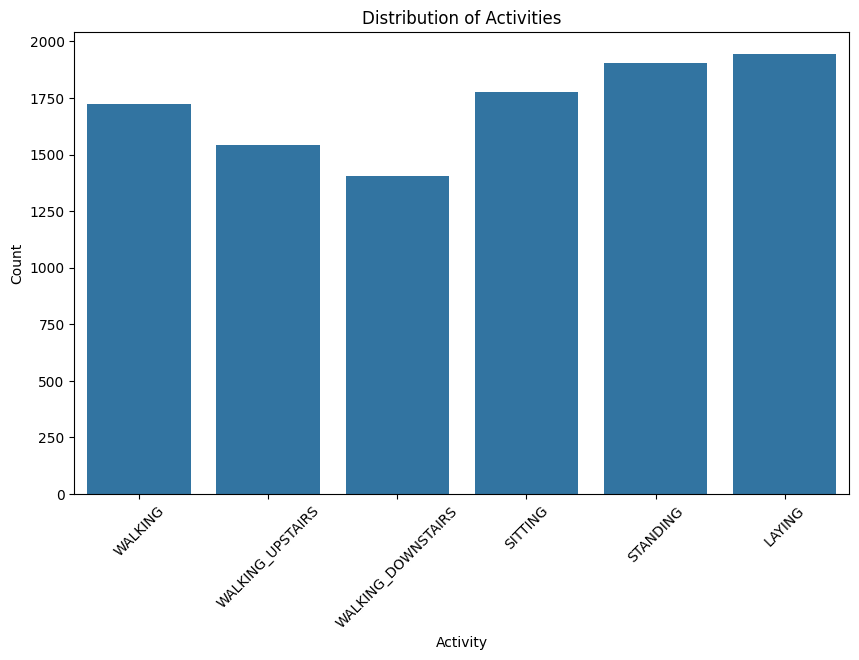

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of activities
activity_counts = y['activity'].value_counts().sort_index()
activity_names = activity_labels.set_index('index').loc[activity_counts.index]['activity']

plt.figure(figsize=(10, 6))
sns.barplot(x=activity_names, y=activity_counts)
plt.title('Distribution of Activities')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the activity labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y['activity'])

# Check the transformed data
print("\nScaled Features:")
print(X_scaled[:5])
print("\nEncoded Labels:")
print(y_encoded[:5])


Scaled Features:
[[ 2.10533854e-01 -6.87026385e-02 -4.52194533e-01 ... -6.74432366e-01
   3.82007658e-01 -1.61505480e-02]
 [ 6.02084832e-02  3.59023537e-02 -2.75221885e-01 ... -6.81359801e-01
   3.83147865e-01 -1.20627169e-04]
 [ 7.84597052e-02 -4.64269585e-02 -8.55480582e-02 ... -6.89470939e-01
   3.84288531e-01  1.92144041e-02]
 [ 7.13747004e-02 -2.27793764e-01 -2.70741068e-01 ... -6.88915135e-01
   3.88536155e-01  2.46242686e-02]
 [ 3.37379044e-02  3.16173394e-02 -1.21379506e-01 ... -6.87381033e-01
   3.99066085e-01  3.86485818e-02]]

Encoded Labels:
[4 4 4 4 4]


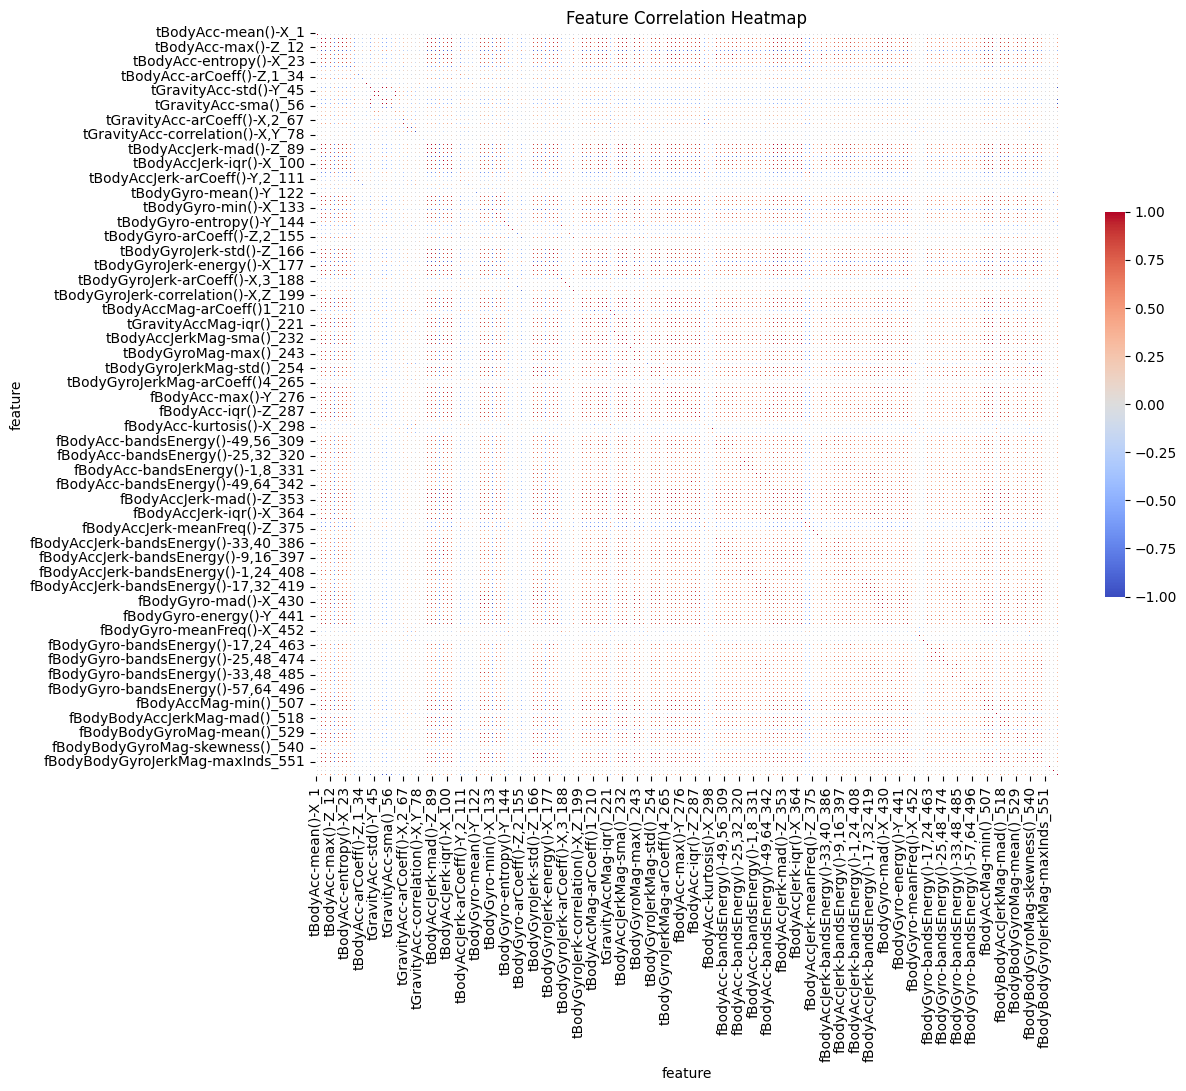

In [10]:
# Compute the correlation matrix
corr_matrix = pd.DataFrame(X_scaled, columns=features['feature']).corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', vmax=1.0, vmin=-1.0, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Feature Correlation Heatmap')
plt.show()

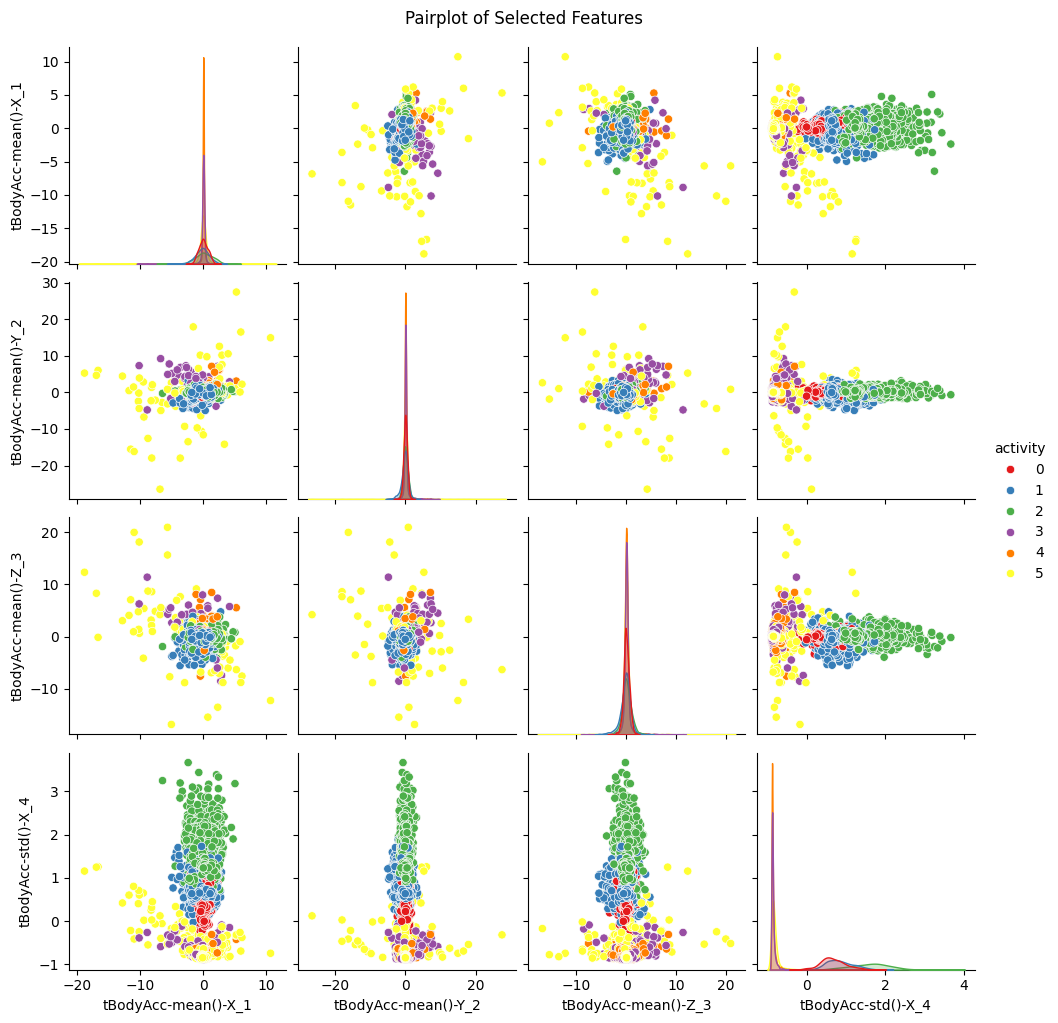

In [11]:
# Select a subset of features for pairplot
selected_features = ['tBodyAcc-mean()-X_1', 'tBodyAcc-mean()-Y_2', 'tBodyAcc-mean()-Z_3', 'tBodyAcc-std()-X_4']
subset = pd.DataFrame(X_scaled, columns=features['feature'])[selected_features]
subset['activity'] = y_encoded

# Plot pairplot
sns.pairplot(subset, hue='activity', palette='Set1', diag_kind='kde')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

C:\Users\bj002\AppData\Local\Temp\ipykernel_19880\2898140762.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='activity', y='tBodyAcc-mean()-X_1', data=X_scaled_df, palette='Set2')


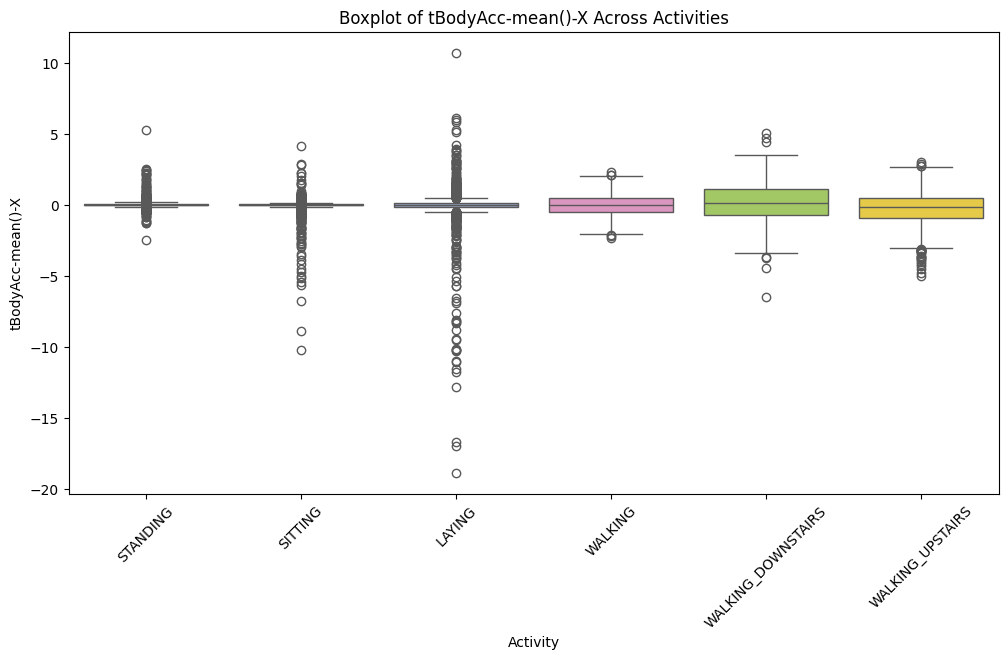

In [12]:
# Add activity labels to the scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=features['feature'])
X_scaled_df['activity'] = y_encoded

# Map encoded labels to activity names
activity_map = dict(zip(range(6), activity_labels['activity']))
X_scaled_df['activity'] = X_scaled_df['activity'].map(activity_map)

# Plot boxplot for a specific feature
plt.figure(figsize=(12, 6))
sns.boxplot(x='activity', y='tBodyAcc-mean()-X_1', data=X_scaled_df, palette='Set2')
plt.title('Boxplot of tBodyAcc-mean()-X Across Activities')
plt.xlabel('Activity')
plt.ylabel('tBodyAcc-mean()-X')
plt.xticks(rotation=45)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred_knn = knn.predict(X_val)
print("KNN Accuracy:", accuracy_score(y_val, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_val, y_pred_knn))

KNN Accuracy: 0.9577669902912621
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       369
           1       0.99      0.99      0.99       270
           2       1.00      0.98      0.99       284
           3       0.94      0.86      0.90       377
           4       0.86      0.94      0.90       354
           5       1.00      1.00      1.00       406

    accuracy                           0.96      2060
   macro avg       0.96      0.96      0.96      2060
weighted avg       0.96      0.96      0.96      2060



In [15]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred_log_reg = log_reg.predict(X_val)
print("Logistic Regression Accuracy:", accuracy_score(y_val, y_pred_log_reg))
print("Logistic Regression Classification Report:\n", classification_report(y_val, y_pred_log_reg))

Logistic Regression Accuracy: 0.9825242718446602
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       369
           1       0.99      1.00      0.99       270
           2       1.00      1.00      1.00       284
           3       0.97      0.94      0.96       377
           4       0.94      0.97      0.96       354
           5       1.00      1.00      1.00       406

    accuracy                           0.98      2060
   macro avg       0.98      0.98      0.98      2060
weighted avg       0.98      0.98      0.98      2060



In [16]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {'n_neighbors': range(1, 11)}

# Initialize GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best KNN Parameters:", grid_search.best_params_)
print("Best KNN Cross-Validated Accuracy:", grid_search.best_score_)

# Evaluate on validation set
best_knn = grid_search.best_estimator_
y_pred_best_knn = best_knn.predict(X_val)
print("Tuned KNN Accuracy:", accuracy_score(y_val, y_pred_best_knn))
print("Tuned KNN Classification Report:\n", classification_report(y_val, y_pred_best_knn))

Best KNN Parameters: {'n_neighbors': 1}
Best KNN Cross-Validated Accuracy: 0.9592175535395334
Tuned KNN Accuracy: 0.9635922330097088
Tuned KNN Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       369
           1       0.99      0.99      0.99       270
           2       0.99      0.98      0.99       284
           3       0.93      0.90      0.91       377
           4       0.89      0.94      0.91       354
           5       1.00      0.99      1.00       406

    accuracy                           0.96      2060
   macro avg       0.97      0.97      0.96      2060
weighted avg       0.96      0.96      0.96      2060



In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define parameter grid for Logistic Regression
param_grid = {
    'max_iter': [100, 500, 1000, 1500],  # Different max_iter values
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear']  # Solver that supports both L1 and L2 penalties
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    LogisticRegression(), 
    param_grid, 
    cv=5,  # 5-fold cross-validation
    scoring='accuracy'
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Logistic Regression Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

# Get the best model
best_log_reg = grid_search.best_estimator_

# Evaluate on validation set
y_pred_best_log_reg = best_log_reg.predict(X_val)
print("Tuned Logistic Regression Accuracy:", accuracy_score(y_val, y_pred_best_log_reg))
print("Tuned Logistic Regression Classification Report:\n", classification_report(y_val, y_pred_best_log_reg))

Best Logistic Regression Parameters: {'C': 1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validated Accuracy: 0.9824006283858265
Tuned Logistic Regression Accuracy: 0.9868932038834951
Tuned Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       369
           1       0.99      1.00      1.00       270
           2       1.00      1.00      1.00       284
           3       0.97      0.97      0.97       377
           4       0.97      0.96      0.96       354
           5       1.00      1.00      1.00       406

    accuracy                           0.99      2060
   macro avg       0.99      0.99      0.99      2060
weighted avg       0.99      0.99      0.99      2060



In [17]:
import numpy as np

# Analyze feature importance for Logistic Regression
importance = np.abs(log_reg.coef_).mean(axis=0)
feature_importance = pd.Series(importance, index=features['feature']).sort_values(ascending=False)

# Display top 10 important features
print("Top 10 Important Features:\n", feature_importance.head(10))

Top 10 Important Features:
 feature
tBodyGyroJerk-entropy()-X_183    1.188049
tGravityAcc-energy()-Y_58        0.824089
tGravityAcc-energy()-X_57        0.638950
fBodyGyro-entropy()-X_446        0.508658
tGravityAcc-max()-Y_51           0.479342
tGravityAcc-mean()-Y_42          0.469085
tGravityAcc-min()-Y_54           0.457172
tGravityAcc-max()-X_50           0.443808
tGravityAcc-min()-X_53           0.442503
tGravityAcc-mean()-X_41          0.441606
dtype: float64


In [18]:
from sklearn.model_selection import cross_val_score

# Cross-validation for KNN
knn_cv_scores = cross_val_score(best_knn, X_scaled, y_encoded, cv=5, scoring='accuracy')
print("KNN Cross-Validation Scores:", knn_cv_scores)
print("KNN Mean CV Accuracy:", knn_cv_scores.mean())

# Cross-validation for Logistic Regression
log_reg_cv_scores = cross_val_score(log_reg, X_scaled, y_encoded, cv=5, scoring='accuracy')
print("Logistic Regression Cross-Validation Scores:", log_reg_cv_scores)
print("Logistic Regression Mean CV Accuracy:", log_reg_cv_scores.mean())

KNN Cross-Validation Scores: [0.85582524 0.86213592 0.87378641 0.87864078 0.84458475]
KNN Mean CV Accuracy: 0.8629946198786289
Logistic Regression Cross-Validation Scores: [0.94854369 0.93009709 0.97135922 0.96990291 0.9592035 ]
Logistic Regression Mean CV Accuracy: 0.9558212818928974
